## P-set 1.

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

1) 40 points

The $\ket{++}$ state is a superposition of two qubits: $\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\otimes\frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) = \frac{1}{2}(\ket{00}+\ket{01}+\ket{10}+\ket{11})$.
    - What is the statevector that describes this state, and what are the measurement probabilities for every state? (Analytical).
    - What circuit do you need to create such a state? (Create the respective circuit with Qiskit and draw/print the circuit.)


2) 20 points

What circuits create the bell states $\ket{00} + \ket{11}$ and $\ket{01} + \ket{10}$? (Create the respective circuit with Qiskit and draw/print the circuit.)


3) 40 points

What is the Matrix that describes the following operator: $XHT$? (print the operator).
    - What is the statevector when applying this operator ($XHT$) to the $\ket{1}$ state? (print the statevector)
    - Visualize this state on the Bloch sphere.
    - What is the probability of measuring $\ket{0}$ and $\ket{1}$ after applying this operator to the $\ket{1}$ state? (Answere in markdown cell)


### Useful commands: 

In [90]:
import numpy as np

from qiskit import *
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
statevector_backend = Aer.get_backend('statevector_simulator')
sim_backend = Aer.get_backend('aer_simulator')

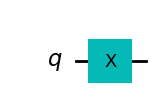

In [91]:
#Create a Quantum circuit
qc = QuantumCircuit(1)
# your quantum gate
qc.x(0)
qc.draw('mpl')

In [92]:
# Get the matrix (operator) that corresponds to the QC.
Operator(qc)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


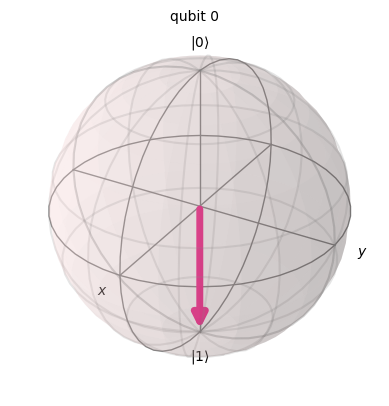

In [93]:
# Get evaluate the statevector
state = statevector_backend.run(qc).result().get_statevector()
print(state)
plot_bloch_multivector(state)

{'1': 1024}


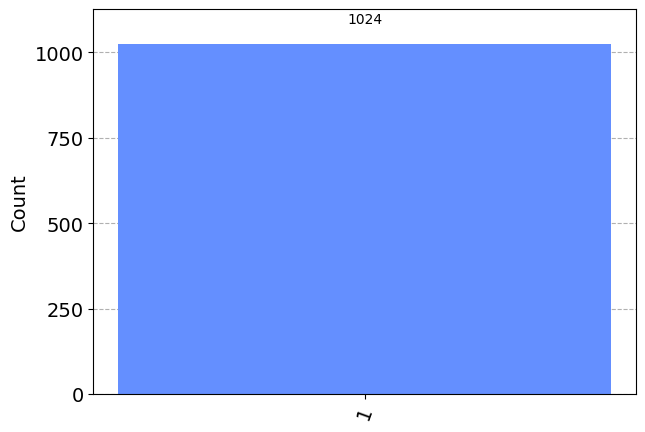

In [94]:
# get quasi probability distribution
qc.measure_all()
qc.draw('mpl')

counts = sim_backend.run(qc,shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

1) 40 points

The $\ket{++}$ state is a superposition of two qubits: $\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\otimes\frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) = \frac{1}{2}(\ket{00}+\ket{01}+\ket{10}+\ket{11})$.
    - What is the statevector that describes this state, and what are the measurement probabilities for every state? (Analytical).
    - What circuit do you need to create such a state? (Create the respective circuit with Qiskit and draw/print the circuit.)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


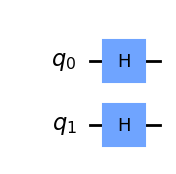

In [95]:
import numpy as np

from qiskit import *
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
statevector_backend = Aer.get_backend('statevector_simulator')
sim_backend = Aer.get_backend('aer_simulator')

qc = QuantumCircuit(2)
# your quantum gate
qc.h(0)
qc.h(1)

# Get evaluate the statevector
state = statevector_backend.run(qc).result().get_statevector()
print(state)

qc.draw('mpl')


2) 20 points

What circuits create the bell states $\ket{00} + \ket{11}$ and $\ket{01} + \ket{10}$? (Create the respective circuit with Qiskit and draw/print the circuit.)

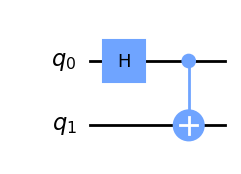

In [96]:
# this one does the 00+11 bell state
circuit00 = QuantumCircuit(2)

circuit00.h(0)
circuit00.cx(0,1)

circuit00.draw('mpl')

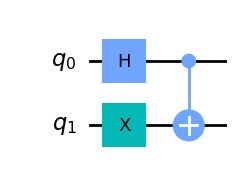

In [97]:
#this one does th 01+10 bell state
circuit01 = QuantumCircuit(2)

circuit01.h(0)
circuit01.x(1)
circuit01.cx(0,1)

circuit01.draw('mpl')

3) 40 points

What is the Matrix that describes the following operator: $XHT$? (print the operator).
    - What is the statevector when applying this operator ($XHT$) to the $\ket{1}$ state? (print the statevector)
    - Visualize this state on the Bloch sphere.
    - What is the probability of measuring $\ket{0}$ and $\ket{1}$ after applying this operator to the $\ket{1}$ state? (Answere in markdown cell)

Operator([[ 0.70710678+0.j , -0.5       -0.5j],
          [ 0.70710678+0.j ,  0.5       +0.5j]],
         input_dims=(2,), output_dims=(2,))


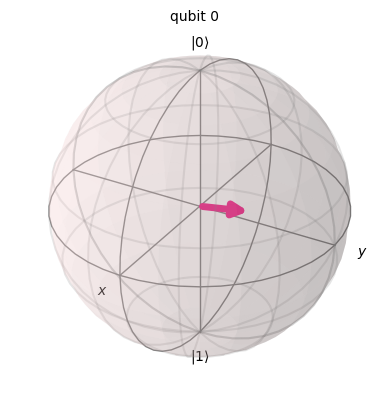

In [98]:
from qiskit.circuit.library import *

x_gate = Operator(XGate())
h_gate = Operator(HGate())
t_gate = Operator(TGate())

xht = Operator(t_gate.compose(h_gate).compose(x_gate))

print(xht)

plot_bloch_multivector(xht)

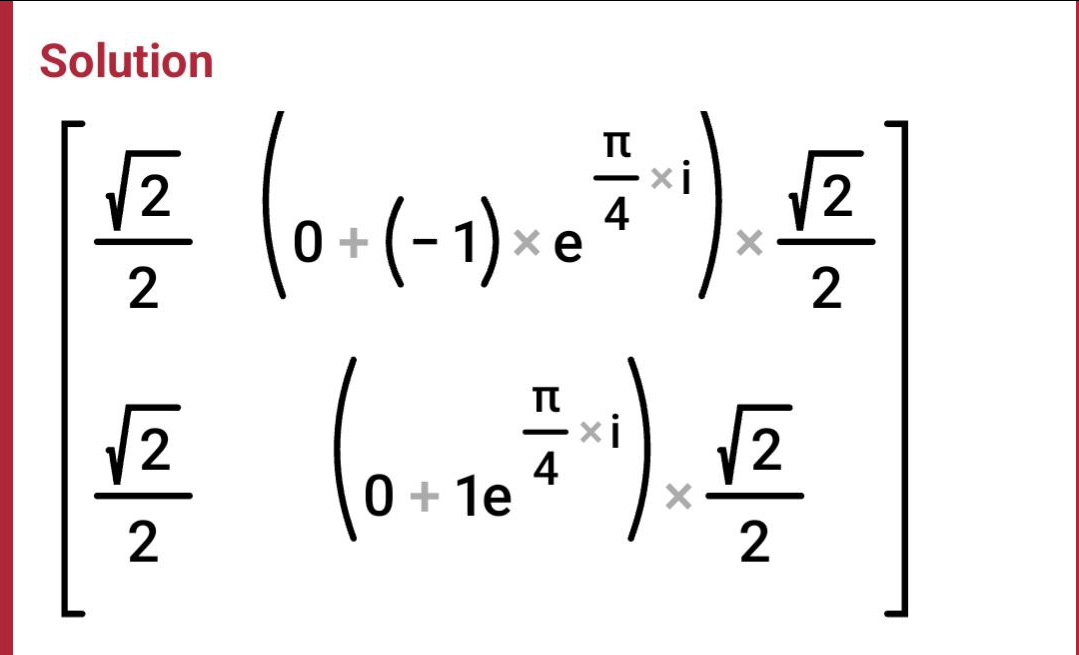


In [99]:
qc = QuantumCircuit(1)
qc.x(0)

#apply to 1:
from qiskit.extensions import UnitaryGate
xht_instruction = UnitaryGate(xht.data, label='xht')
qc.append(xht_instruction, [0])


# Get evaluate the statevector
state = statevector_backend.run(qc).result().get_statevector()
print(state)

Statevector([-0.5-0.5j,  0.5+0.5j],
            dims=(2,))


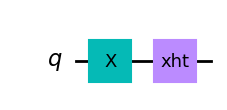

In [100]:
qc.draw('mpl')

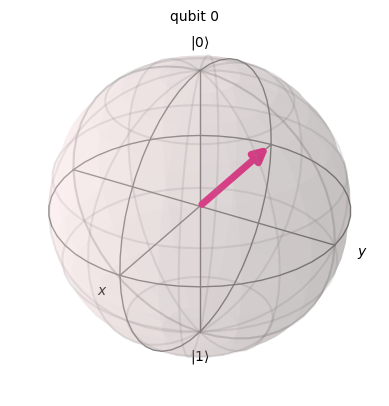

In [101]:
plot_bloch_multivector(qc)

{'1': 498, '0': 526}


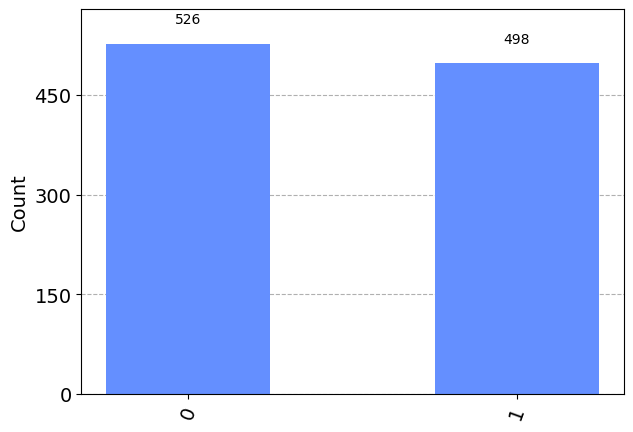

In [102]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.aer import AerSimulator

#mearure
qc.measure_all()

# Use the Aer simulator to execute the circuit
counts = sim_backend.run(qc,shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)